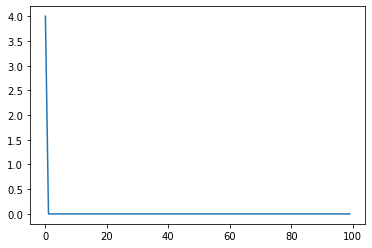

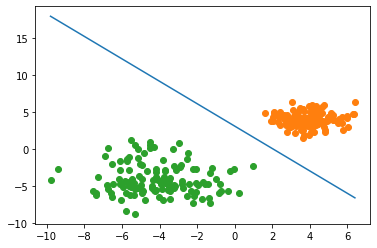

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

# perceptron simple à 1 neurone
def perceptron(x, w, active: bool):
    # vérification de la fonction d'activation à utiliser
    if (active):
        X = x[0] * w[0,1] + x[1] * w[0,2] + w[0,0]
        y = 1 if np.sign(X) > 0.5 else -1
    else:
        y = np.tanh(x)
    return y

# apprentissage du perceptron
def apprentissage(x, yd, active):
    # récupération des poids synaptiques
    w = np.array([0.1, 0.5, 0.5,0,0,0])
    w.shape = (2,3)
    erreurs = np.array([0]*100)
    # nombre d'itérations pour améliorer les résultats d'apprentissage
    for i in range(100):
        erreur =0
        for p in range(len(x[0])):
            tmpx = [x[0][p], x[1][p], yd[p]]
            y = perceptron(tmpx, w, active)
            # compararaison entre la classe calculée et la classe attendue
            if y == yd[p]:
                pass
            # si classe différentes calcul des nouveaux poids synaptiques
            else:
                w[0,1] = w[0,1] + 0.1 * (yd[1] - y) * x[0][0]
                w[0,2] = w[0,2] + 0.1 * (yd[1] - y) * x[0][1]
                w[0,0] = 1
                erreur+= (yd[p] - y)**2
        erreurs[i] = erreur

    return w, erreurs

# affichage des points selon leur classe ainsi que le séparateur linéaire entre celles-ci
def affiche_classe(x, clas, K, w):
    t = [np.min(x[0, :]), np.max(x[0, :])]
    z = [(-w[0,0] - w[0, 1] * np.min(x[0, :])) / w[0, 2], (-w[0, 0] - w[0, 1] * np.max(x[0, :])) / w[0, 2]]

    plt.plot(t, z)

    ind = (clas == -1)
    plt.plot(x[0, ind], x[1, ind], "o")

    ind = (clas == 1)
    plt.plot(x[0, ind], x[1, ind], "o")

    plt.show()


# données de test
mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]]  #
data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))
mean2 = [-4, -4]
cov2 = [[4, 0], [0, 4]]  #
data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data = np.concatenate((data1, data2), axis=1)
oracle = np.concatenate((np.zeros(128) - 1, np.ones(128)))
w, mdiff = apprentissage(data, oracle, True)
# affichage de la courbe d'erreur
plt.plot(mdiff)
plt.show()
affiche_classe(data, oracle, 2, w)